___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [1]:
#pip install yellowbrick

In [2]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from sklearn.linear_model import LinearRegression

from scipy.stats import skew
import scipy.stats as stats
from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Ingest the data to notebook

In [3]:
df = pd.read_csv("heart.csv")

# EDA

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [47]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='age', ylabel='sex'>

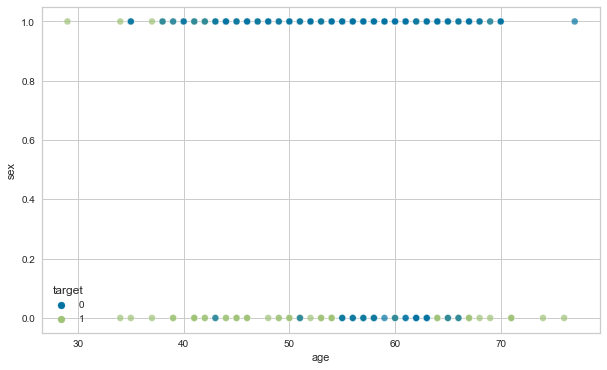

In [48]:
sns.scatterplot(x='age',y='sex',hue='target',data=df,alpha=0.7)

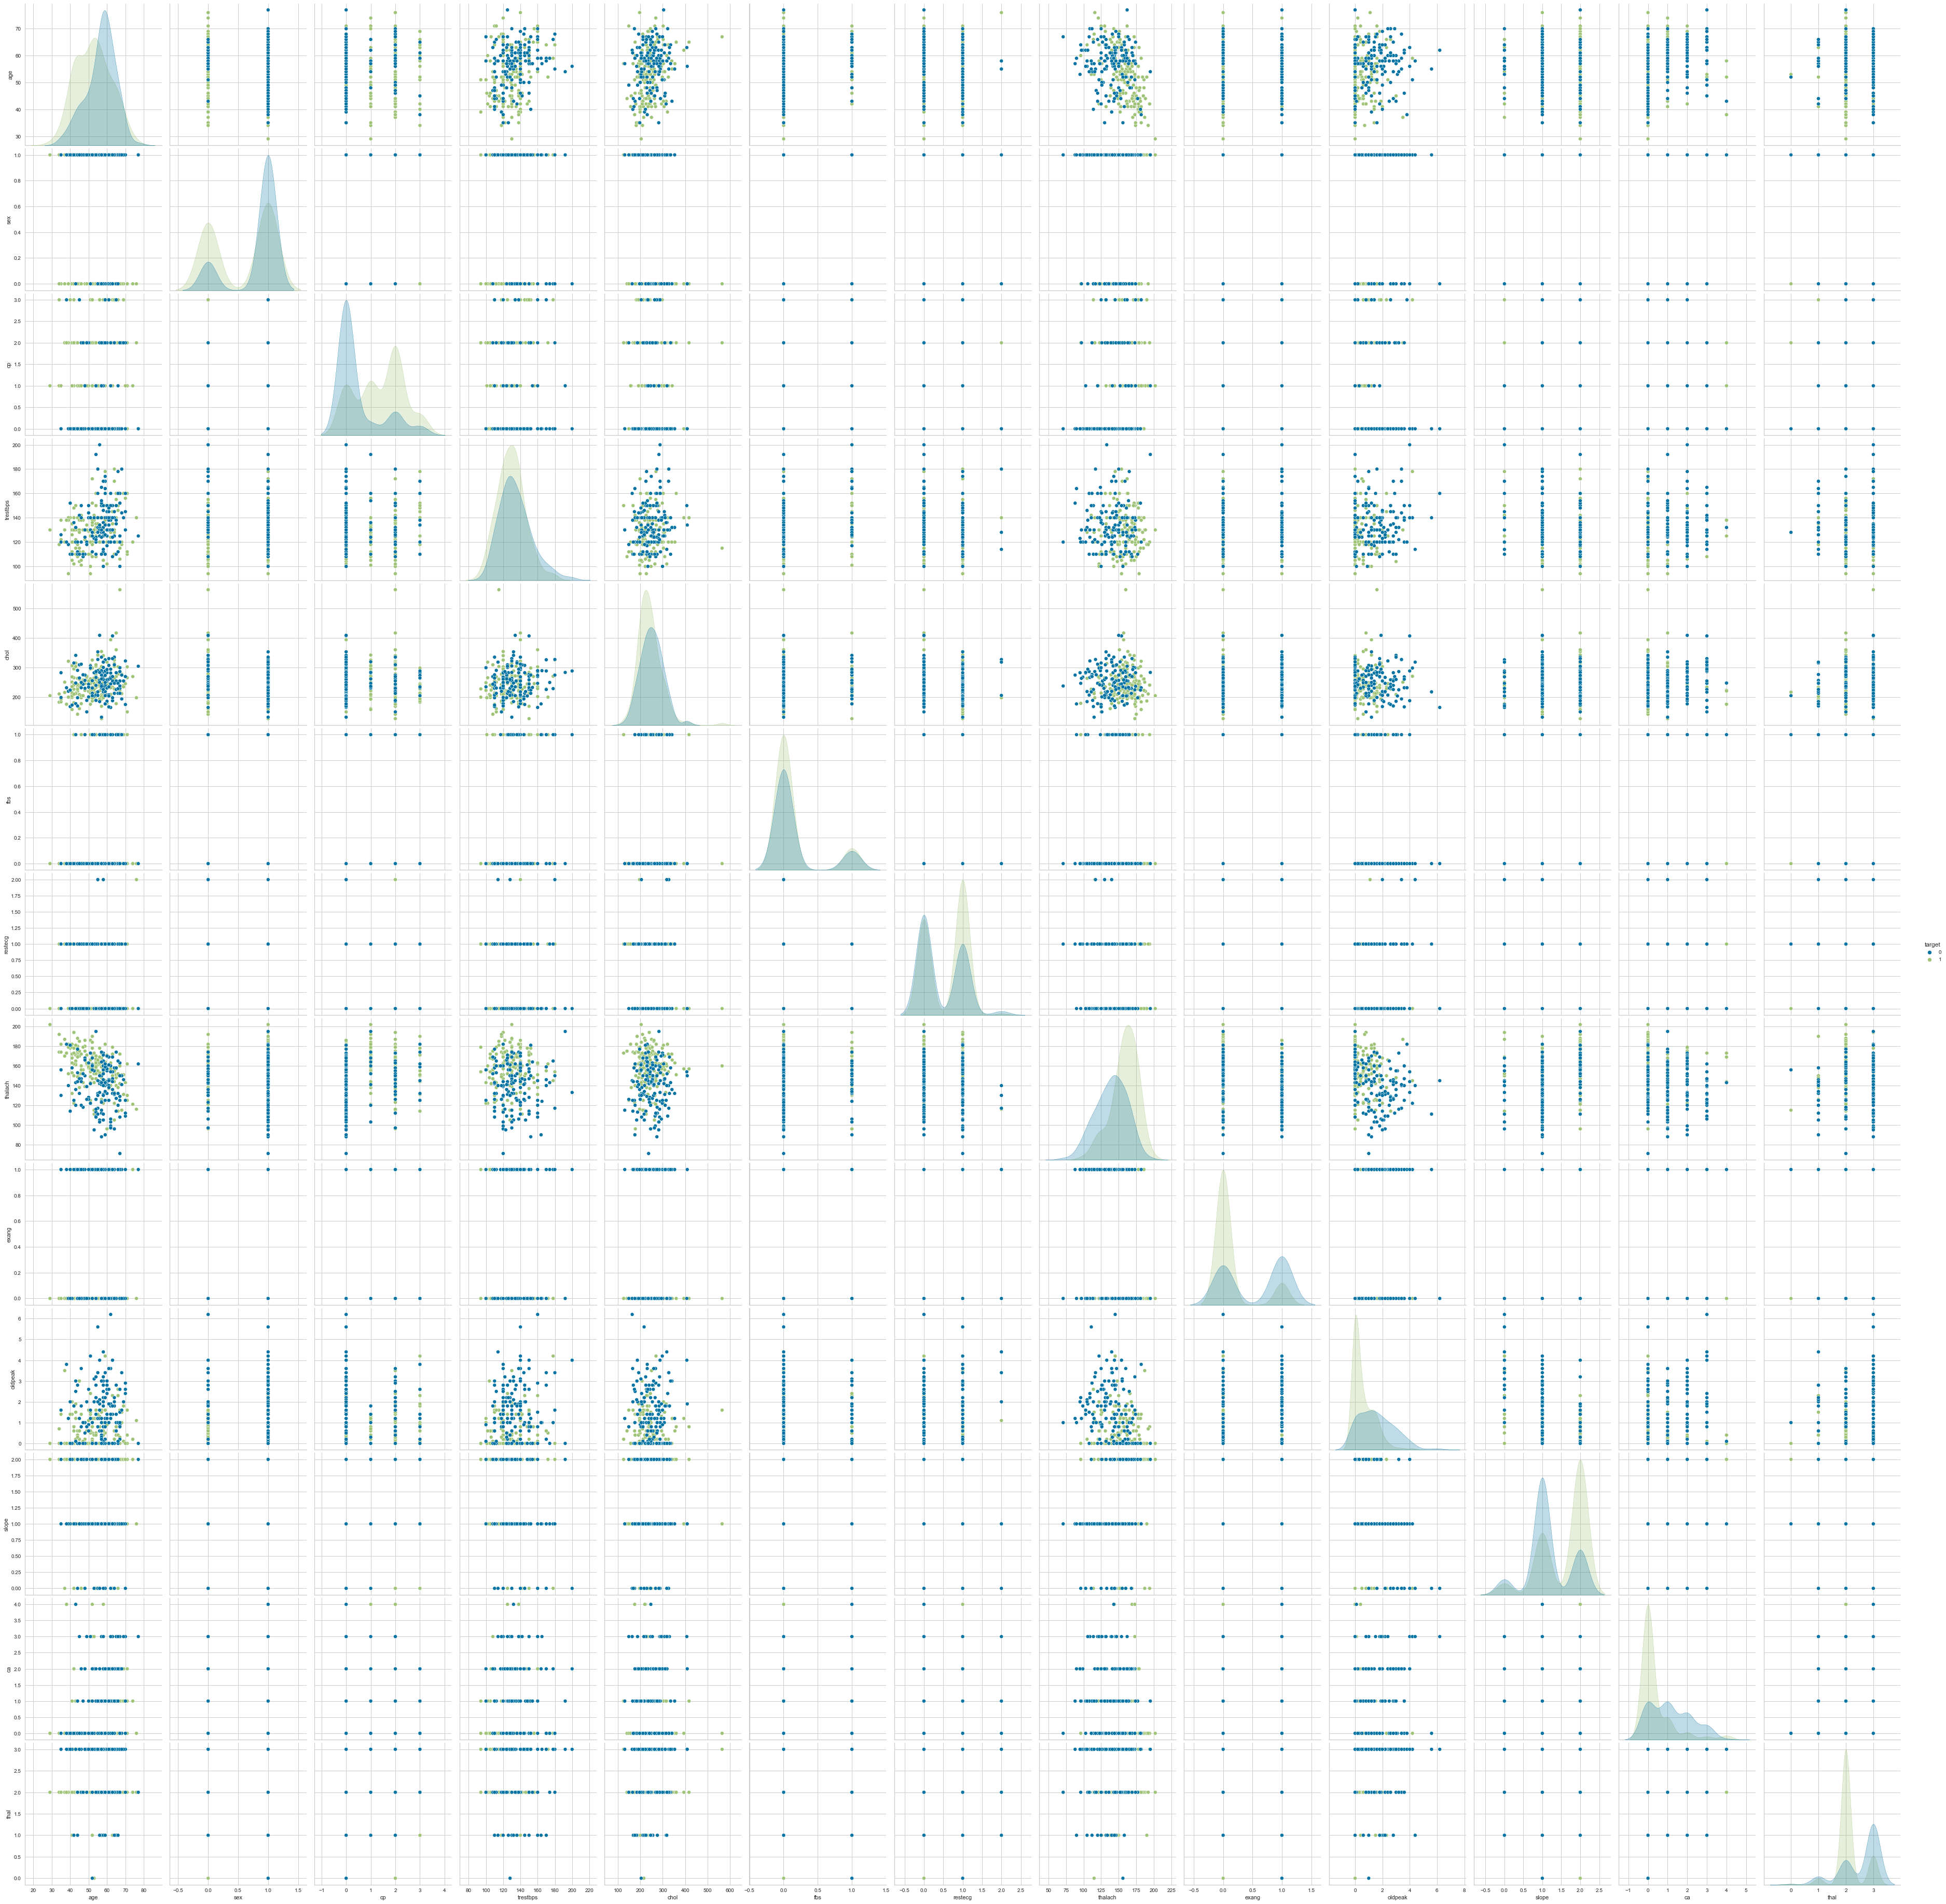

In [52]:
sns.pairplot(data=df, hue="target", height=4, aspect =1);

<AxesSubplot:xlabel='target', ylabel='age'>

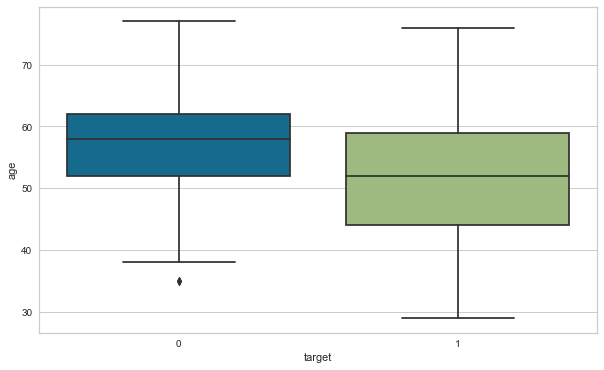

In [53]:
sns.boxplot(x= 'target', y = 'age', data=df)

<AxesSubplot:xlabel='target', ylabel='sex'>

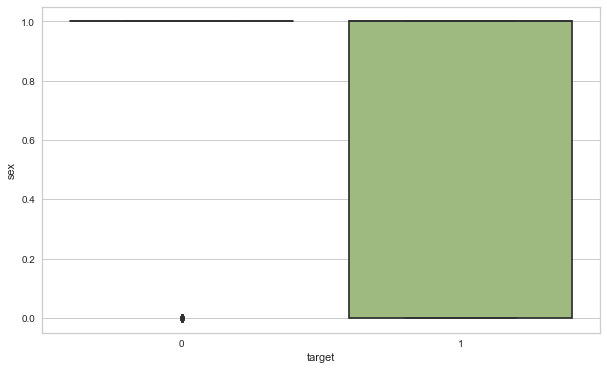

In [54]:
sns.boxplot(x= 'target', y = 'sex', data=df)

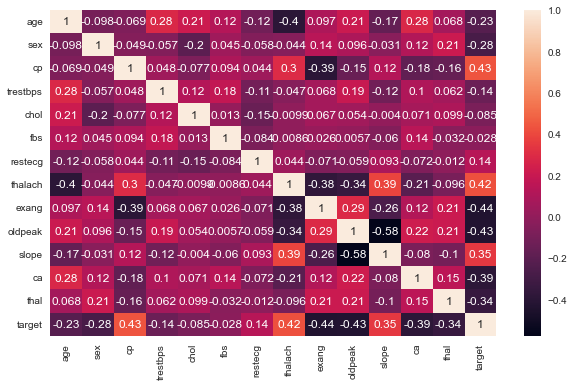

In [56]:
sns.heatmap(df.corr(), annot=True);

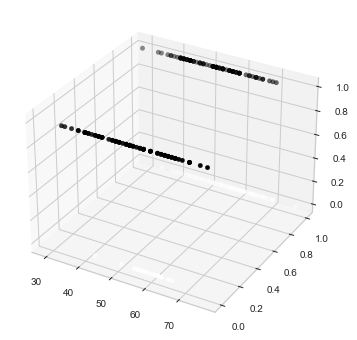

In [65]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['sex'], df["target"],c=df['target']);

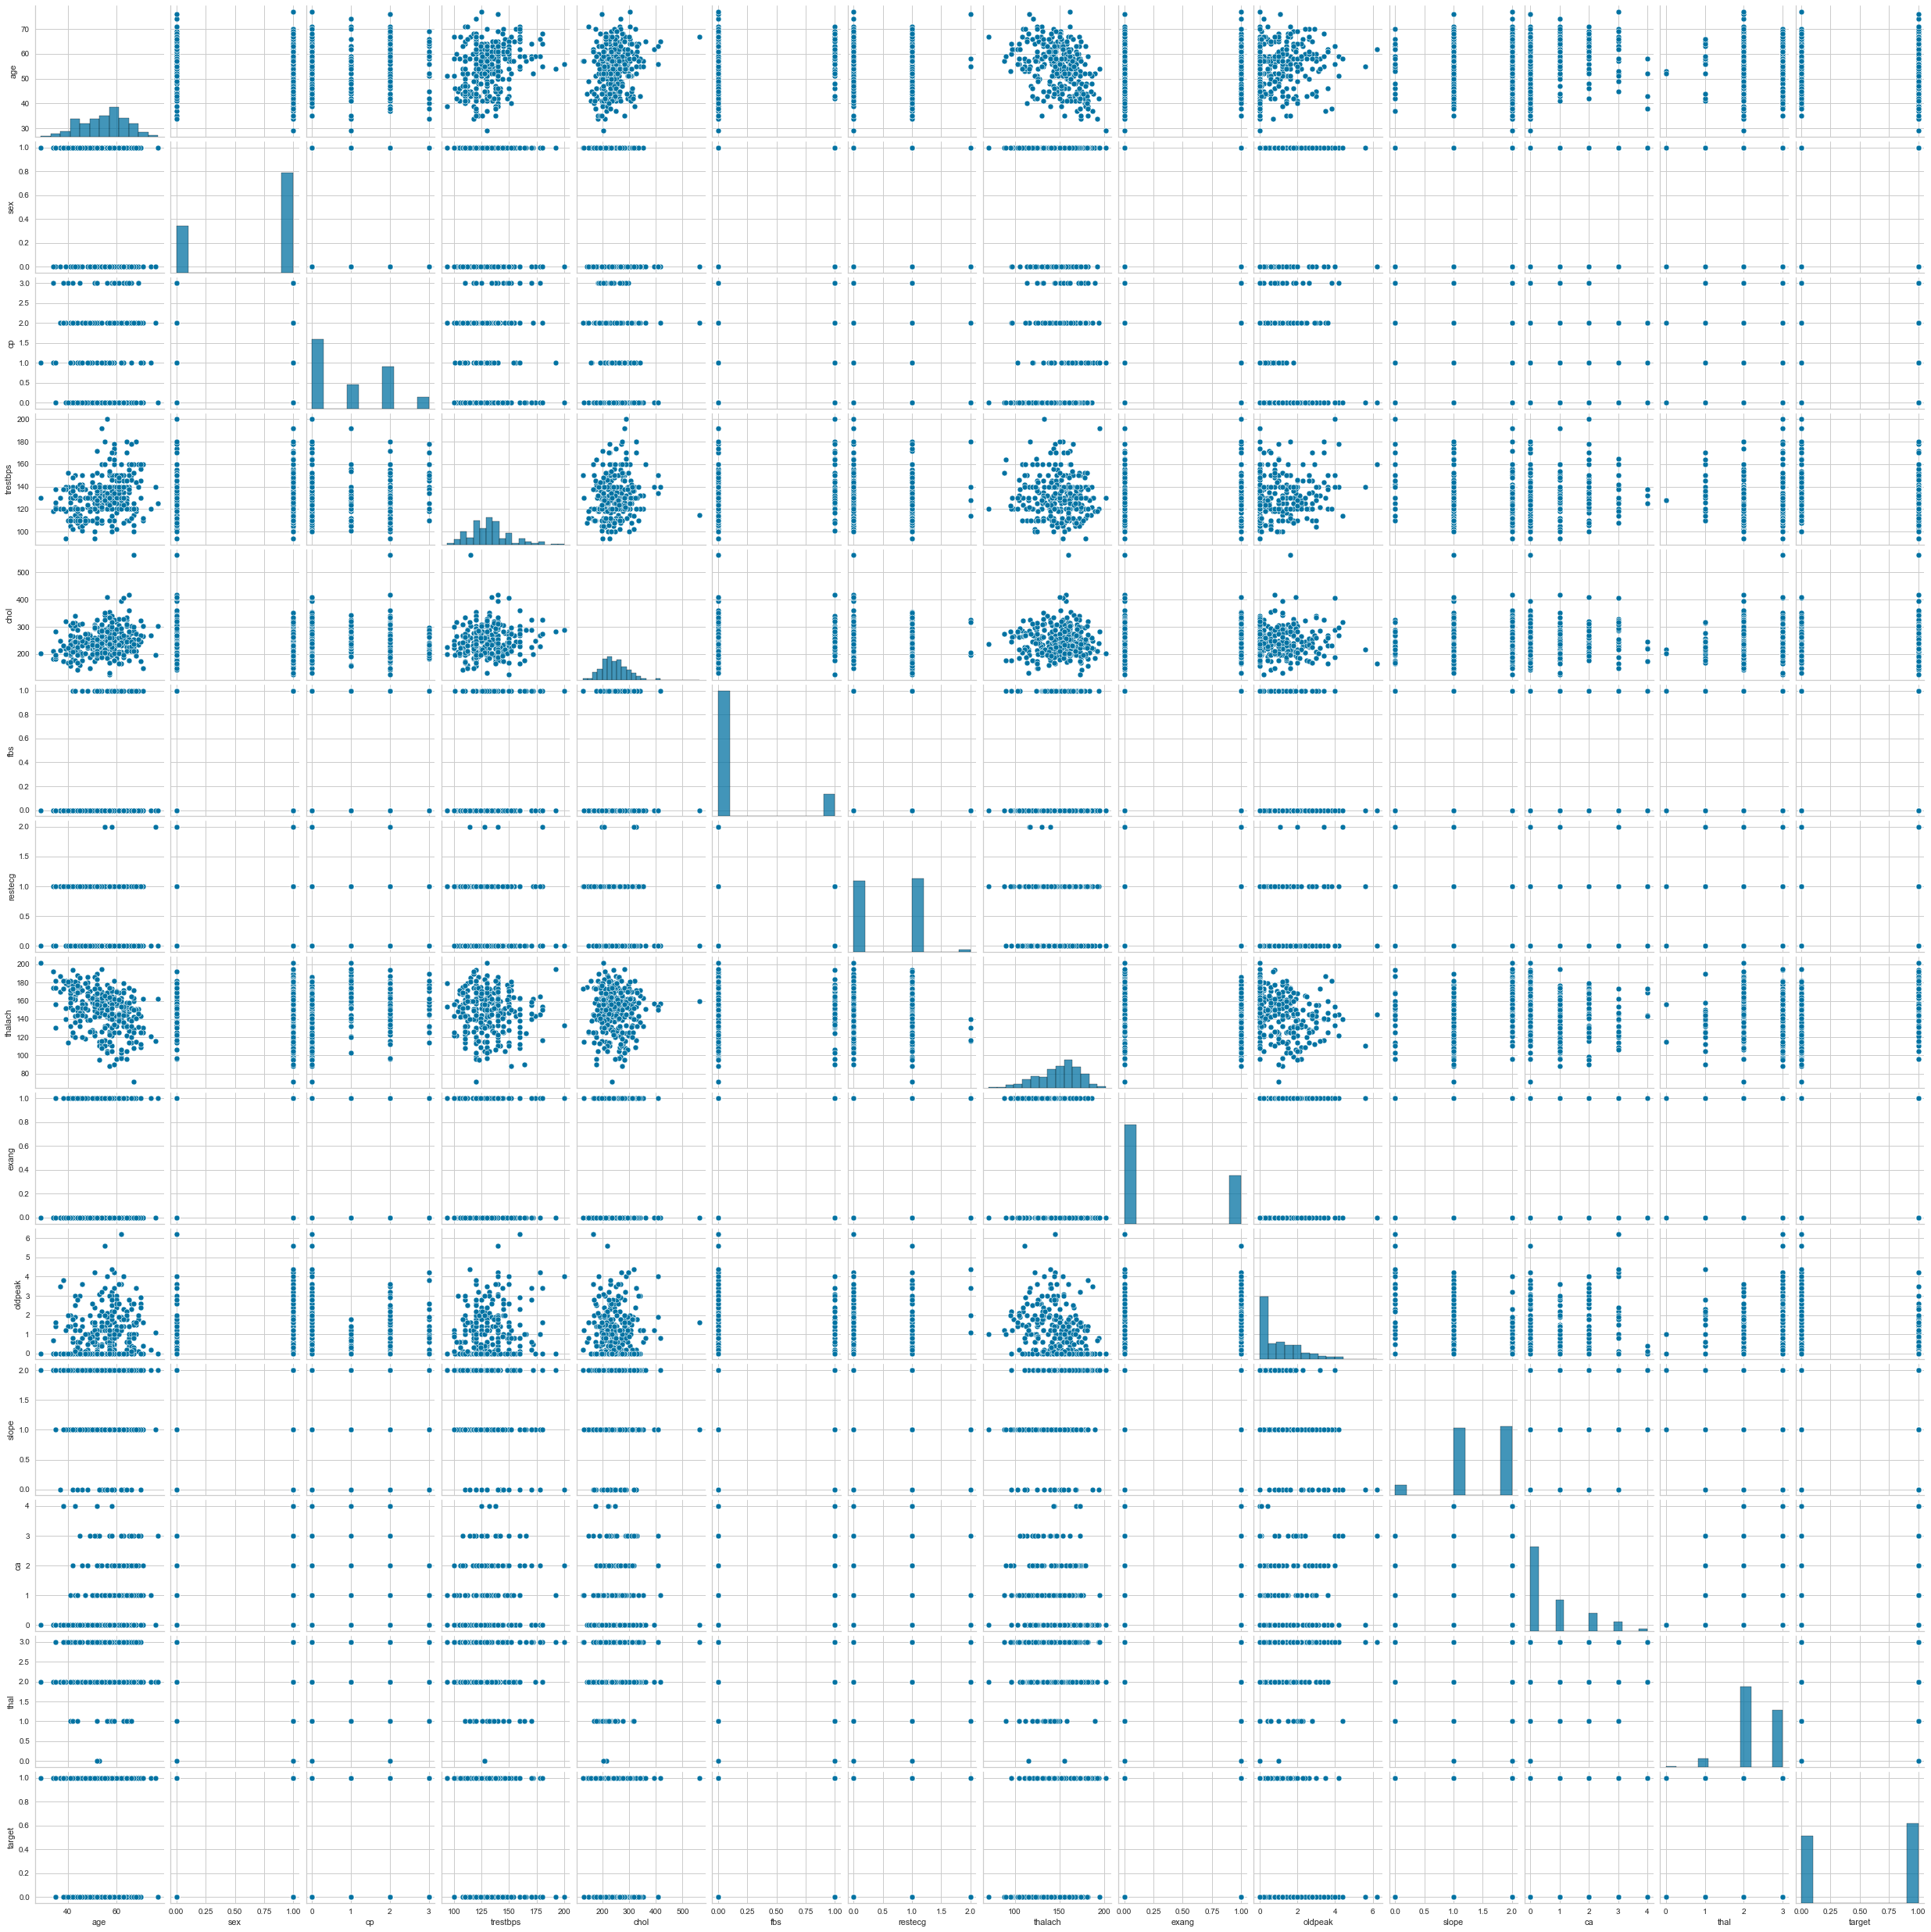

In [89]:
sns.pairplot(df);

# Data Preprocessing

**Train & Test Split**

In [9]:
X = df.drop("target", axis =1)
y = df["target"]

In [10]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
scaler = StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
#help(LogisticRegression)

In [16]:
log_model = LogisticRegression()

In [17]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [20]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.99541327, 0.00458673],
       [0.14205168, 0.85794832],
       [0.24535551, 0.75464449],
       [0.01964829, 0.98035171],
       [0.98396884, 0.01603116],
       [0.14538284, 0.85461716],
       [0.05809623, 0.94190377],
       [0.98393033, 0.01606967],
       [0.96686037, 0.03313963],
       [0.22424508, 0.77575492],
       [0.96821202, 0.03178798],
       [0.27293386, 0.72706614],
       [0.94929549, 0.05070451],
       [0.63181915, 0.36818085],
       [0.0899156 , 0.9100844 ],
       [0.23143786, 0.76856214],
       [0.01582669, 0.98417331],
       [0.26194704, 0.73805296],
       [0.19836991, 0.80163009],
       [0.98310046, 0.01689954],
       [0.98833906, 0.01166094],
       [0.45429042, 0.54570958],
       [0.28091232, 0.71908768],
       [0.35325178, 0.64674822],
       [0.59989999, 0.40010001],
       [0.03564634, 0.96435366],
       [0.98317905, 0.01682095],
       [0.25413798, 0.74586202],
       [0.9761731 , 0.0238269 ],
       [0.92671995, 0.07328005],
       [0.

**X_test + y_yest + y_pred + y_pred_proba**

In [21]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


In [22]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0,0.004587
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,0.857948
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,0.754644
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1,0.980352
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,0.016031
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1,0.854617
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1,0.941904
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0,0.016070
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0,0.033140
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1,0.775755


In [23]:
test_data["pred"] = y_pred
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba,pred
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0,0.004587,0
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,0.857948,1
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,0.754644,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1,0.980352,1
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,0.016031,0
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1,0.854617,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1,0.941904,1
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0,0.016070,0
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0,0.033140,0
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1,0.775755,1


In [24]:
test_data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba,pred
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0,0.073628,0
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0,0.121221,0
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0,0.016070,0
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1,0.703208,1
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1,0.801630,1
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0,0.242666,0
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1,0.768562,1
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1,0.984173,1
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1,0.649098,1
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1,0.519829,1


**Model Performance on Classification Tasks** 

In [25]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [26]:
accuracy_score(y_test,y_pred)

0.8571428571428571

In [28]:
precision_score(y_test, y_pred)

0.8269230769230769

In [29]:
recall_score(y_test, y_pred)

0.9148936170212766

In [30]:
f1_score(y_test,y_pred)

0.8686868686868686

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [32]:
confusion_matrix(y_test,y_pred)

array([[35,  9],
       [ 4, 43]], dtype=int64)

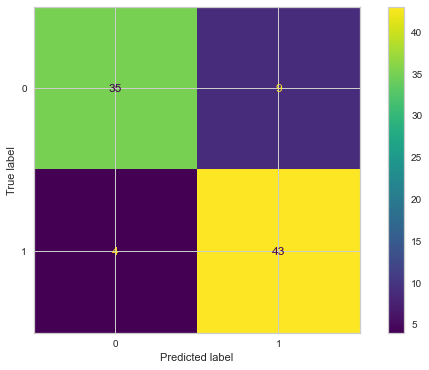

In [33]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

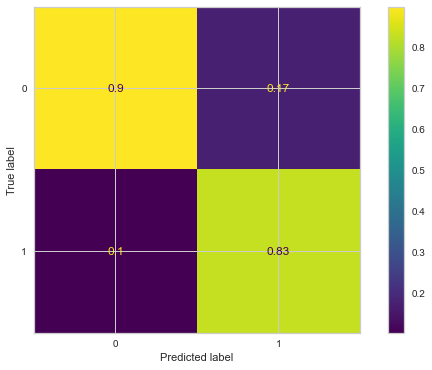

In [34]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='pred');

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84        44
           1       0.83      0.91      0.87        47

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



In [36]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        94
           1       0.85      0.90      0.87       118

    accuracy                           0.85       212
   macro avg       0.86      0.85      0.85       212
weighted avg       0.85      0.85      0.85       212



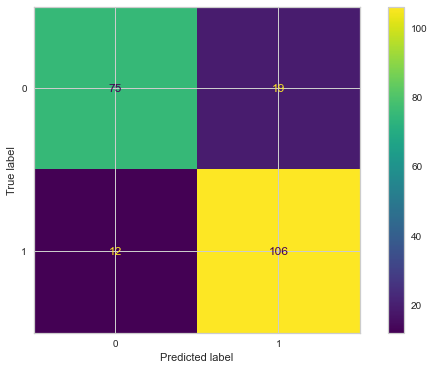

In [37]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

**GridSearchCV**

In [43]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [38]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [39]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [40]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [41]:
grid_model.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

In [44]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[35  9]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.85        44
           1       0.83      0.94      0.88        47

    accuracy                           0.87        91
   macro avg       0.88      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91


Train_Set
[[ 69  25]
 [  9 109]]
              precision    recall  f1-score   support

           0       0.88      0.73      0.80        94
           1       0.81      0.92      0.87       118

    accuracy                           0.84       212
   macro avg       0.85      0.83      0.83       212
weighted avg       0.84      0.84      0.84       212



# Implement KNN and Evaluate

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [67]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [68]:
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_knn

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [69]:
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)

In [70]:
pd.DataFrame(y_pred_proba_knn)

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
5,0.0,1.0
6,0.0,1.0
7,1.0,0.0
8,0.8,0.2
9,0.4,0.6


In [71]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba_knn[:,1], "Proba_0":y_pred_proba_knn[:,0]}

In [72]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
16,1,1,1.0,0.0
243,0,0,0.4,0.6
18,1,1,1.0,0.0
150,1,0,0.6,0.4
65,1,1,1.0,0.0
73,1,0,0.8,0.2
272,0,0,0.2,0.8
118,1,1,1.0,0.0
119,1,1,0.8,0.2
154,1,1,1.0,0.0


**Model Performance on Classification Tasks**

In [73]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [74]:
confusion_matrix(y_test, y_pred)

array([[35,  9],
       [ 4, 43]], dtype=int64)

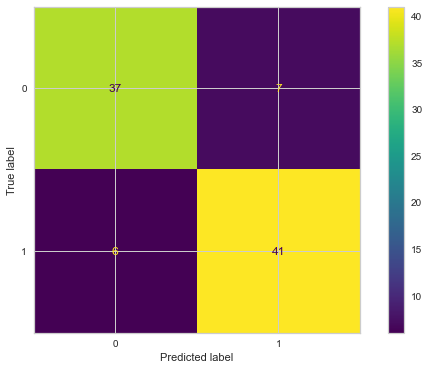

In [75]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [76]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[37  7]
 [ 6 41]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        44
           1       0.85      0.87      0.86        47

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



**Gridsearch Method for Choosing Reasonable K Values**

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
knn_grid = KNeighborsClassifier()

In [79]:
k_values= range(1,30)

In [80]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [81]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [82]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [83]:
knn_grid_model.best_params_

{'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}

In [84]:
print('WITH K=21\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=21

Test_Set
[[36  8]
 [ 7 40]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        44
           1       0.83      0.85      0.84        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91


Train_Set
[[ 78  16]
 [ 12 106]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        94
           1       0.87      0.90      0.88       118

    accuracy                           0.87       212
   macro avg       0.87      0.86      0.87       212
weighted avg       0.87      0.87      0.87       212



# Visually compare models based on your chosen metric

*LogisticRegression*

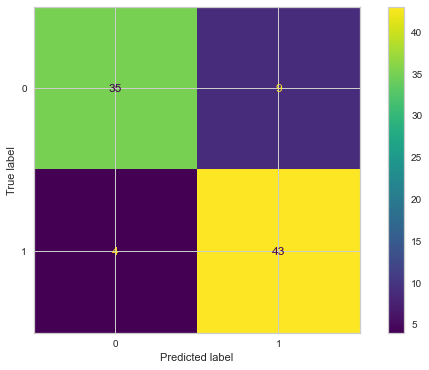

In [85]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

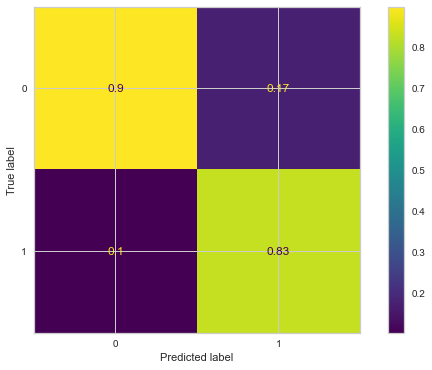

In [86]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='pred');

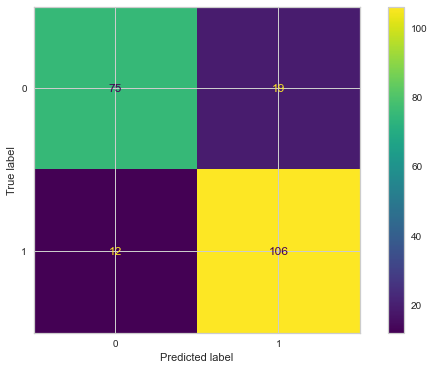

In [87]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

*KNeighborsClassifier (KNN)*

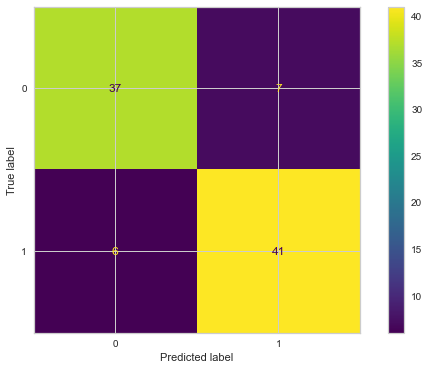

In [88]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

# Chose best model and make a random prediction 

**LinearRegression**

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
model_2 = LinearRegression()

In [92]:
model_2.fit(X_train, y_train)

LinearRegression()

In [94]:
y_pred_lr = model_2.predict(X_test)
y_pred_lr 

array([-0.2096916 ,  0.77187675,  0.65457047,  1.04213999, -0.03966798,
        0.77866174,  0.900233  , -0.06183514,  0.07327262,  0.72578118,
        0.0352338 ,  0.64882073,  0.10018343,  0.4225633 ,  0.87646114,
        0.69899888,  1.10193676,  0.65033836,  0.72029505, -0.04978499,
       -0.12022159,  0.59490109,  0.65242158,  0.63387172,  0.45797937,
        0.98182631, -0.03243057,  0.70528799,  0.02315394,  0.16000971,
       -0.08013046,  0.66451637,  0.22938618,  0.51847439,  1.01313206,
        0.57239314,  0.85856079,  0.69933893,  0.85467984,  0.91432317,
        0.3312597 ,  0.84185067,  0.84335295,  0.6206795 ,  0.47357308,
        0.56395669,  0.34551973,  1.00572355,  1.30598052,  0.30903133,
       -0.0840037 ,  0.58086235, -0.00810943,  0.96617957,  0.76007933,
        0.17832442,  0.12991787,  1.24367861, -0.09051025,  0.12617075,
        0.78343488,  0.59661436,  0.21779626,  0.94566918,  0.47410692,
       -0.13297525,  0.84216274,  0.54441467,  1.12004468,  0.74

In [95]:
model_2.intercept_

1.1277029177822397

In [96]:
model_2.coef_

array([-0.00250146, -0.20398819,  0.1245529 , -0.0023718 , -0.00056666,
        0.07411175,  0.04558417,  0.00213565, -0.14451341, -0.05554416,
        0.08991863, -0.09374062, -0.12262954])

In [99]:
my_dict_2 = {"Actual": y_test, "Pred": y_pred_lr, "Residual":y_test-y_pred_lr}

In [101]:
comparing = pd.DataFrame(my_dict_2)

In [102]:
comparing.sample(10)

,Actual,Pred,Residual
119,1,0.572393,0.427607
39,1,0.843353,0.156647
208,0,0.331260,-0.331260
98,1,0.705288,0.294712
201,0,-0.039668,0.039668
230,0,0.966180,-0.966180
128,1,1.013132,-0.013132
31,1,0.510511,0.489489
257,0,0.140389,-0.140389
272,0,0.323532,-0.323532


In [103]:
result_sample = comparing.head(25)
result_sample

,Actual,Pred,Residual
221,0,-0.209692,0.209692
8,1,0.771877,0.228123
89,1,0.654570,0.345430
154,1,1.042140,-0.042140
201,0,-0.039668,0.039668
12,1,0.778662,0.221338
65,1,0.900233,0.099767
187,0,-0.061835,0.061835
240,0,0.073273,-0.073273
117,1,0.725781,0.274219


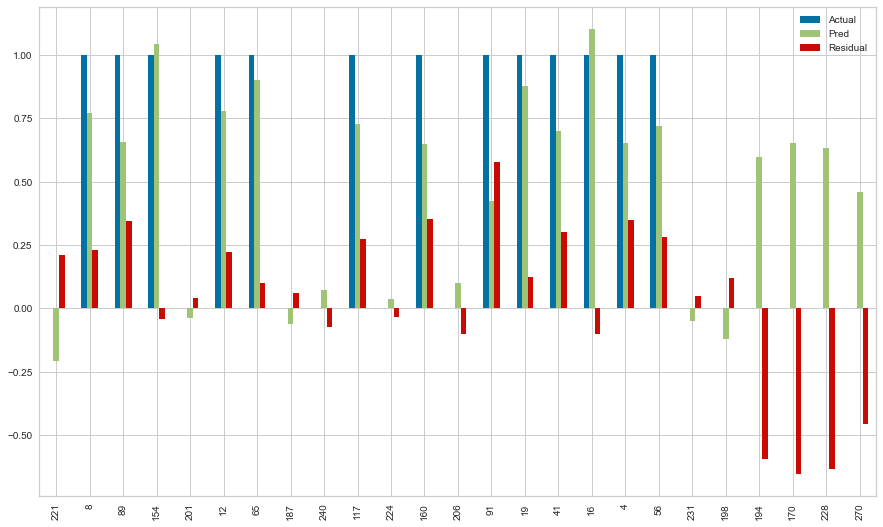

In [104]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()

**Error Metrics**

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [106]:
R2_score = r2_score(y_test, y_pred_lr)
R2_score

0.5367907038637076

In [107]:
mae = mean_absolute_error(y_test, y_pred_lr)
mae

0.27104239016787574

In [108]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse

0.3401124330906463

**Evaluation Model**

In [109]:
def eval_metric_2(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [110]:
eval_metric_2(y_test, y_pred_lr)

Model testing performance:
--------------------------
R2_score 	: 0.5367907038637076
MAE 		: 0.27104239016787574
MSE 		: 0.11567646714283936
RMSE 		: 0.3401124330906463


In [111]:
y_train_pred = model_2.predict(X_train)

In [112]:
eval_metric_2(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.5020948821576243
MAE 		: 0.2835677698622992
MSE 		: 0.12288099784415346
RMSE 		: 0.3505438600862287
